<a href="https://colab.research.google.com/github/md-shojibc/Python-code/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

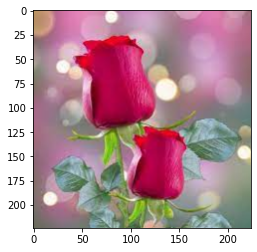

(224, 224, 3)
(1, 224, 224, 3)


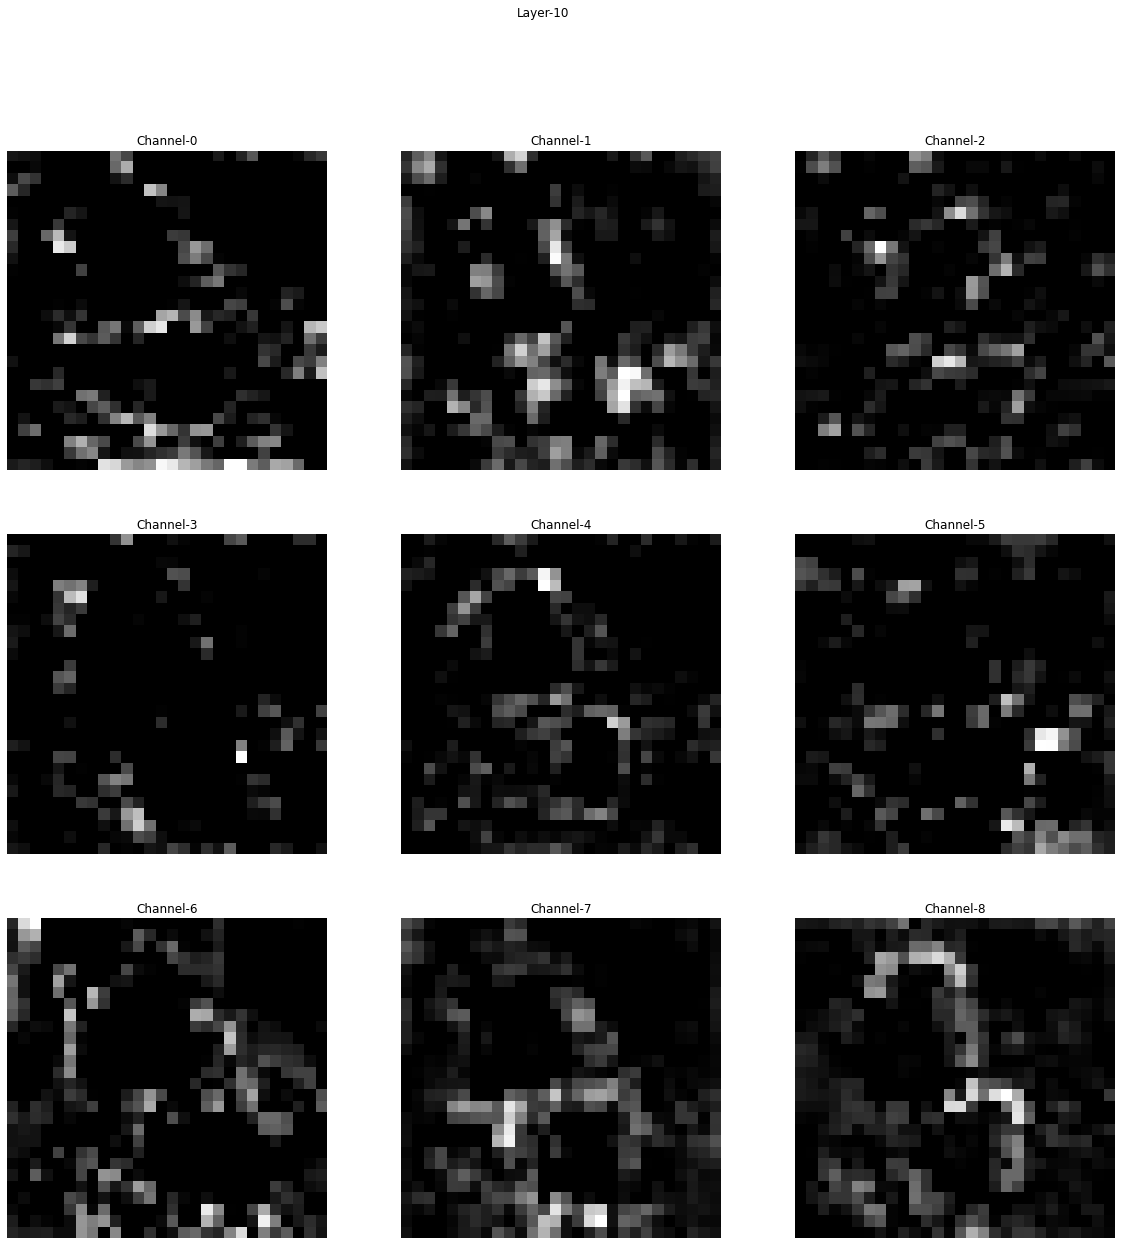

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
img='/flower.jpeg'
def main():
	# Load a pre-trained model.
	baseModel = VGG16()
	baseModel.summary()
		
	# Prepare a new model having the desired layer as the output layer.
	layer_number = 10 # *** Change layer number to see different convolution layer's output.
	inputs = baseModel.input
	outputs = baseModel.layers[layer_number].output
	model = Model(inputs, outputs)

	# Prepare data.
	img = prepare_data()

	# Predict output of a specific layer.
	outputs = model.predict(img)
	
	# Display what different channls see.
	display_channels(outputs, layer_number)
	
def display_channels(chSet, layer_no):	
	plt.figure(figsize = (20, 20))
	plt.suptitle('Layer-' + str(layer_no))
	for i in range(9):
		plt.subplot(3, 3, i + 1)
		plt.title('Channel-' + str(i))
		plt.imshow(chSet[0, :, :, i], cmap = 'gray')
		plt.axis('off')
	plt.show()
	plt.close()
	
def prepare_data():
	# Load an image
	bgrImg = cv2.imread(img)
	print(bgrImg.shape)
	
	# Convert the image from BGR into RGB format
	rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
	
	# Reshape the image so that it can fit into the model.
	#display_img(rgbImg)
	rgbImg = cv2.resize(rgbImg, (224, 224))
	display_img(rgbImg)
	
	# Expand dimension since the model accepts 4D data.
	print(rgbImg.shape)
	rgbImg = np.expand_dims(rgbImg, axis = 0)
	print(rgbImg.shape)
	
	# Preprocess image
	rgbImg = preprocess_input(rgbImg)
	
	return rgbImg
	
def display_img(img):
	plt.imshow(img)
	plt.show()
	plt.close()

if __name__ == '__main__':
	main()

